Este conjunto de datos contiene diez variables base como edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad en un año.

In [13]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np
import random
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = load_diabetes( return_X_y=False, as_frame=True)
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


### Definir y entrenar regresor

In [3]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=1)
value = X_train.values[5]
print(value)

[ 0.03444337  0.05068012 -0.00189471 -0.01255635  0.03833367  0.01371725
  0.0780932  -0.03949338  0.00455189 -0.09634616]


### Evaluar error obtenido

In [4]:
mlp = MLPRegressor(max_iter=7000,
                   hidden_layer_sizes=(6),
                   activation='logistic',
                   learning_rate_init=0.03,  
                   verbose = False
                   )
mlp.fit(X_train, y_train)
print("Cantidad de iteraciones: " +str(mlp.n_iter_))

Cantidad de iteraciones: 6148


In [5]:
y_pred = mlp.predict(X_test)
error = metrics.mean_squared_error(y_test,y_pred)
print(error)

3597.4929544814922


### Prueba

Predecir y comparar el resultado para 10 valores cualquiera del conjunto de prueba
- ¿Qué diferencia existe entre el valor obtenido del real? ¿Qué significa esto para el paciente?
- ¿Este modelo es suficientemente exacto para utilizarse con nuevos pacientes? ¿Por qué?
- Predecir los mismos valores utilizando un árbol de desición. ¿Cuál método se adapta mejor a los datos?

In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=1)
value = X_train.values[5]
random_train = []
random_output = []

size = len(X_train)
index = np.random.choice(range(size-1),size=10,replace=False)


for x in index:
    random_train.append(X_train.iloc[x].tolist())
    random_output.append(y_train.iloc[x].tolist())

print(random_output)

[222.0, 144.0, 143.0, 64.0, 126.0, 43.0, 113.0, 48.0, 148.0, 200.0]


In [29]:
prediction = mlp.predict(random_train)
neural_network_predict = list()
for x, y in zip(random_train, random_output):
    neural_network_predict_temp = mlp.predict(np.array(x).reshape(1, -1))
    print(f"El valor de y fue:{neural_network_predict_temp[0]}, valor real {y}")
    neural_network_predict.append(neural_network_predict_temp[0])
        

El valor de y fue:215.5851818910152, valor real 222.0
El valor de y fue:117.26083074665236, valor real 144.0
El valor de y fue:121.06374281056704, valor real 143.0
El valor de y fue:77.87412374626868, valor real 64.0
El valor de y fue:170.34580560318838, valor real 126.0
El valor de y fue:58.323263337980194, valor real 43.0
El valor de y fue:83.22722285772679, valor real 113.0
El valor de y fue:70.45492397561902, valor real 48.0
El valor de y fue:90.94717772512527, valor real 148.0
El valor de y fue:119.82182833267102, valor real 200.0


**Respuesta:** La diferencia entre la predicción obtenida con el valor real significa que nuestro algoritmo "exagera" la condición del paciente.
- b) No es lo suficiente exacto, el paciente tiene la posibilidad de ser exagerada su condicion

In [22]:
reg = DecisionTreeRegressor(max_depth=4)
reg = reg.fit(random_train, random_output)
tree_prediction = reg.predict(random_train)
print(tree_prediction)

[222.  144.  143.   64.  126.   45.5 113.   45.5 148.  200. ]


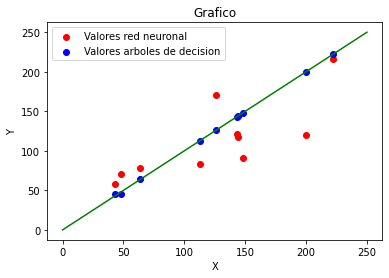

In [38]:
ax = random_output
ay = neural_network_predict
bx = random_output
by = tree_prediction.tolist()

plt.scatter(ax,ay,color='red',label='Valores red neuronal') 
plt.scatter(bx,by,color='blue',label='Valores arboles de decision') 
plt.xlabel("X")
plt.ylabel("Y")
#plt.ylabel("Z")
plt.title("Grafico")
plt.legend(loc='best')
plt.plot([250, 0], [250, 0], 'g-')
plt.show()

Predecir los mismos valores utilizando un árbol de desición. ¿Cuál método se adapta mejor a los datos?

El metodo que se adapta mejor a los datos es el arbol de decision.